# Linear regression

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score
from statsmodels.tools.eval_measures import stde

## Read the etl info results

In [2]:
df_info = pd.read_csv('../dataset_clean/options_csv_v1_etl.csv')
df_info

,generic_features,remove_atypical_values,feature_combination,remove_feature_selection,remove_time_features,remove_invalid_correlated_features
0,False,False,degree 2 polynomial,False,True,False


## Read the dataset

In [3]:
df = pd.read_csv('../dataset_clean/PlatteRiverWeir_features_v1_clean.csv')
df

,Stage,Discharge,exposure,fNumber,isoSpeed,shutterSpeed,grayMean,graySigma,entropyMean,entropySigma,...,WwCurveLineMin^2,WwCurveLineMin WwCurveLineMax,WwCurveLineMin WwCurveLineMean,WwCurveLineMin WwCurveLineSigma,WwCurveLineMax^2,WwCurveLineMax WwCurveLineMean,WwCurveLineMax WwCurveLineSigma,WwCurveLineMean^2,WwCurveLineMean WwCurveLineSigma,WwCurveLineSigma^2
0,2.99,916.0,0.000250,4.0,200.0,-1.0,97.405096,39.623303,0.203417,0.979825,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,2.99,916.0,0.000312,4.0,200.0,-1.0,104.066757,40.179745,0.206835,1.002624,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,2.96,873.0,0.000312,4.0,200.0,-1.0,105.636831,40.533218,0.204756,0.994246,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,2.94,846.0,0.000312,4.0,200.0,-1.0,104.418949,41.752678,0.202428,0.983170,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,2.94,846.0,0.000312,4.0,200.0,-1.0,106.763541,44.442097,0.202661,0.989625,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42054,2.54,434.0,0.000312,4.0,200.0,-1.0,82.872720,57.702652,0.221708,1.076393,...,0.0,0.0,0.0,0.0,4.911907e+09,2.631754e+09,1.152506e+09,1.410070e+09,6.175020e+08,2.704183e+08
42055,2.54,434.0,0.000250,4.0,200.0,-1.0,89.028383,55.840861,0.233168,1.124774,...,0.0,0.0,0.0,0.0,4.908544e+09,2.760217e+09,1.121607e+09,1.552150e+09,6.307123e+08,2.562883e+08
42056,2.54,434.0,0.000250,4.0,200.0,-1.0,94.722097,54.355753,0.240722,1.151833,...,0.0,0.0,0.0,0.0,5.827032e+09,3.156453e+09,1.335051e+09,1.709823e+09,7.231858e+08,3.058782e+08
42057,2.54,434.0,0.000312,4.0,200.0,-1.0,96.693270,52.787629,0.244789,1.171987,...,0.0,0.0,0.0,0.0,6.222370e+09,3.514502e+09,1.441040e+09,1.985052e+09,8.139242e+08,3.337306e+08


## Divide dataset to X and Y

In [4]:
y = df[["Stage", "Discharge"]]
X = df.drop(columns=["Stage", "Discharge"])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

## Train model

In [6]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LinearRegression())
])

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
clf = cross_val_score(pipeline, X_train, y_train, scoring='r2', cv=folds)

In [7]:
clf

array([-5.11513637e+20, -4.14440994e+18, -8.27275557e+19, -5.56038271e+18,
       -3.03540729e+19])

In [8]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', LinearRegression())])

## Test Model

In [9]:
y_pred = pipeline.predict(X_test)

In [10]:
print("R^2: ", r2_score(y_test, y_pred))
print("Error estandar: ", stde(y_test.squeeze(), y_pred.squeeze(), ddof = len(X.columns) + 1))

R^2:  -2.1737971042574483e+19
Error estandar:  [4.00275248e+09 5.81545534e+12]


In [11]:
residuals = y_test - y_pred
residuals

,Stage,Discharge
2714,0.156093,205.137172
6409,-0.094323,-66.984288
23395,0.394657,382.118251
3335,-1.890758,-2881.595226
31874,-0.460206,-639.577977
...,...,...
11619,-0.018333,20.835536
4541,-0.049357,-5.369542
37056,0.007555,17.496791
34059,0.122283,147.321254


Text(0, 0.5, 'Standarized residuals stage')

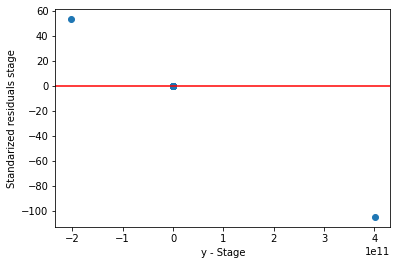

In [12]:
resid = np.array(residuals["Stage"])
norm_resid = resid / resid.std()

plt.scatter([i[0] for i in y_pred], norm_resid)
plt.axhline(y = 0.0, color = 'r', linestyle = '-')
plt.xlabel("y - Stage")
plt.ylabel("Standarized residuals stage")

Text(0, 0.5, 'Standarized residuals Discharge')

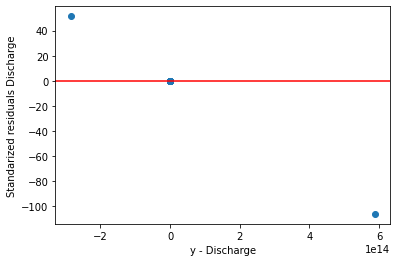

In [13]:
resid = np.array(residuals["Discharge"])
norm_resid = resid / resid.std()

plt.scatter([i[1] for i in y_pred], norm_resid)
plt.axhline(y = 0.0, color = 'r', linestyle = '-')
plt.xlabel("y - Discharge")
plt.ylabel("Standarized residuals Discharge")